# Проект по дисциплината "Методи и софтуер за машинно обучение"

# **1.  Importing and installing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **2. Loading Data**

In [2]:
df = pd.read_csv('shuffle_email_spam_classification.csv') 

# **3.Summarizing data**

In [3]:
df.head() # prints the first five records

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.tail() # prints the last five records

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


# **3.1. Shape of the dataset**

In [5]:
df.shape # 5172 records and 3002 attributes (features)

(5172, 3002)

# **3.3. Summary Statistics**

In [6]:
df.describe() # to understand the statistics of the features like count, mean, median (50%), standard deviation, min and max, and 25th and 75th quantiles

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


# **4. Data Preprocessing**

# **4.1. Data Cleaning**

# **4.1.1. Identifying missing data**

In [7]:
df.isna().sum() # to identify if the dataset is missing values through the method isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

**Duplicated rows**

In [8]:
df[df.duplicated()] # to identify if there are duplicate rows in the dataset

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction


In [9]:
df.drop(columns=['Email No.'],inplace=True) # delete this column because is unused in the model

# **4.2. Outliers**

**Boxplots to identify outliers**

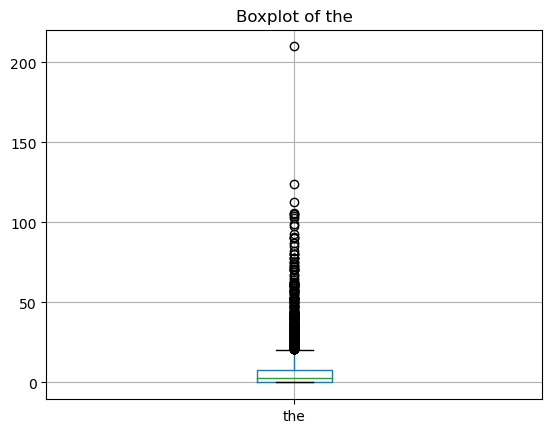

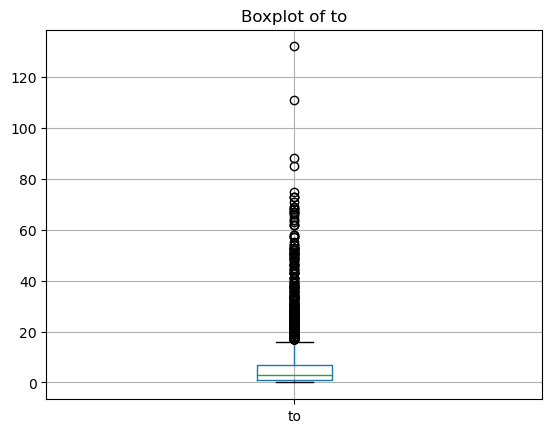

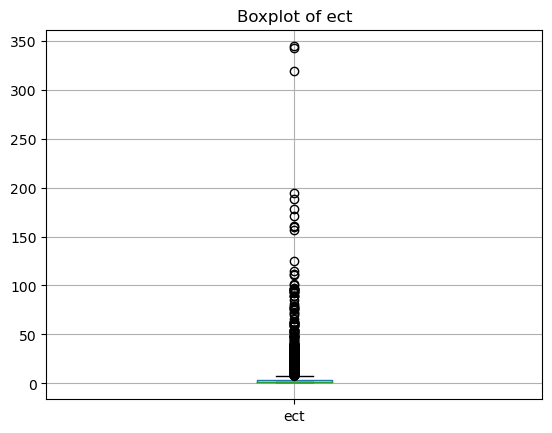

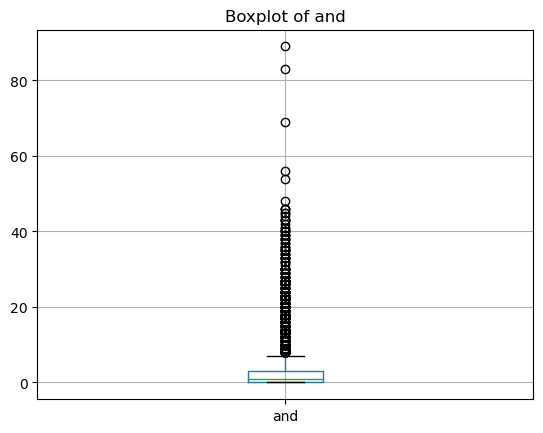

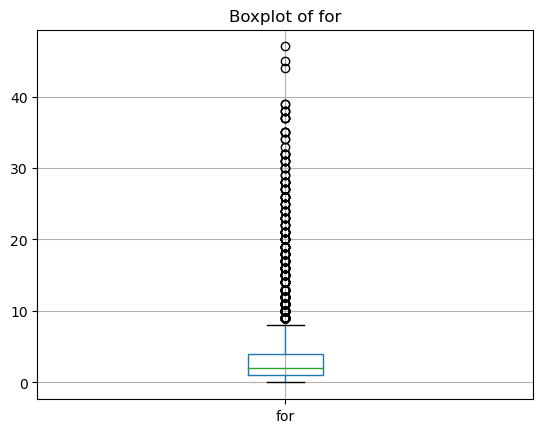

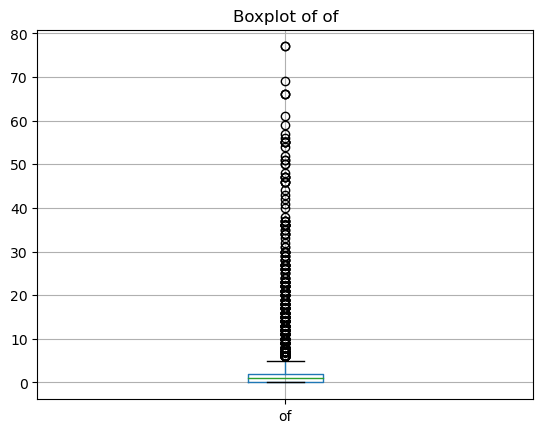

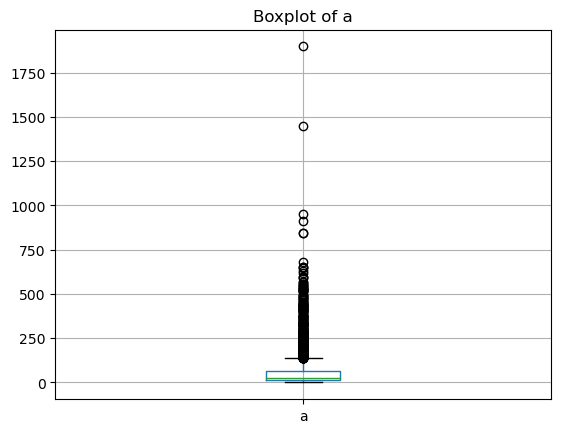

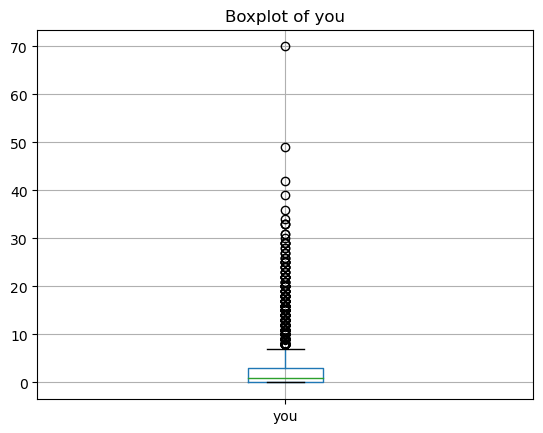

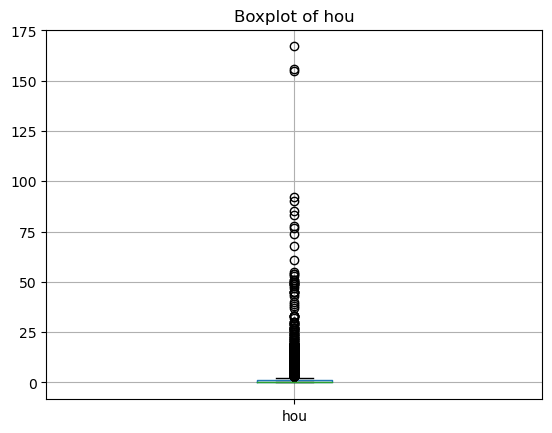

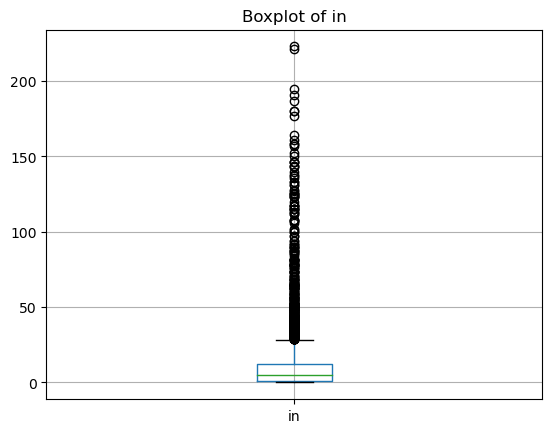

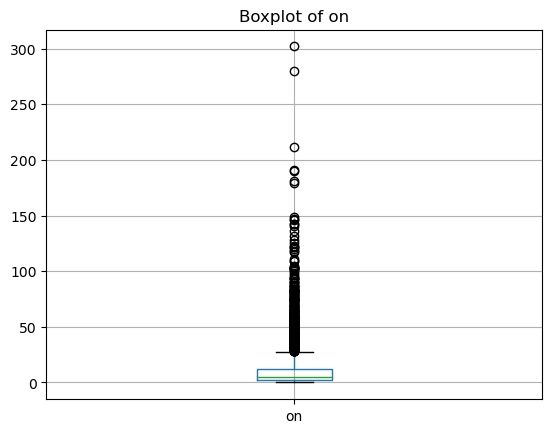

In [10]:
for column in df.columns[:11]:
        plt.figure()
        df.boxplot(column=column)
        plt.title(f"Boxplot of {column}")
        plt.show() # through for loop - iterate by first 11 columns in the dataset which are categorical and all features content outliers which can be object of the analysis

# **5.EDA (Exploratory Data Analysis)**

# **5.1.Distribution of data**

<Figure size 640x480 with 0 Axes>

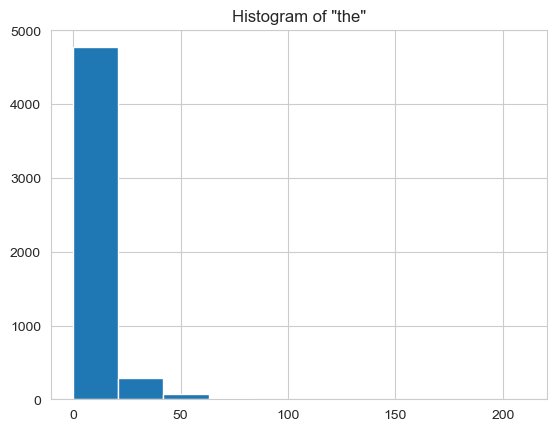

<Figure size 640x480 with 0 Axes>

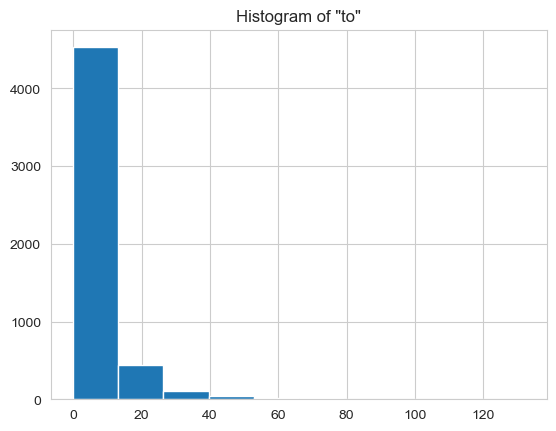

<Figure size 640x480 with 0 Axes>

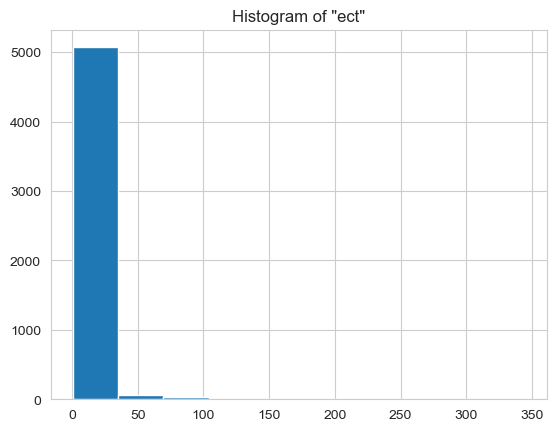

<Figure size 640x480 with 0 Axes>

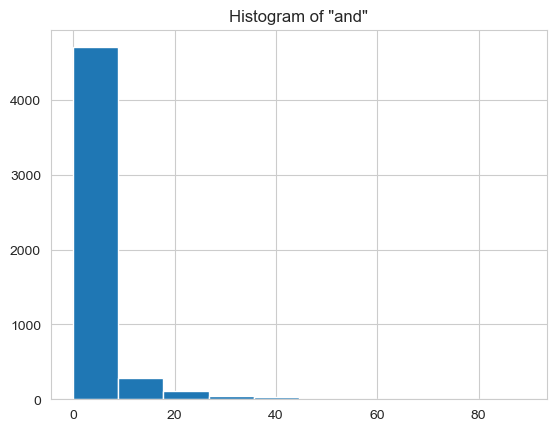

<Figure size 640x480 with 0 Axes>

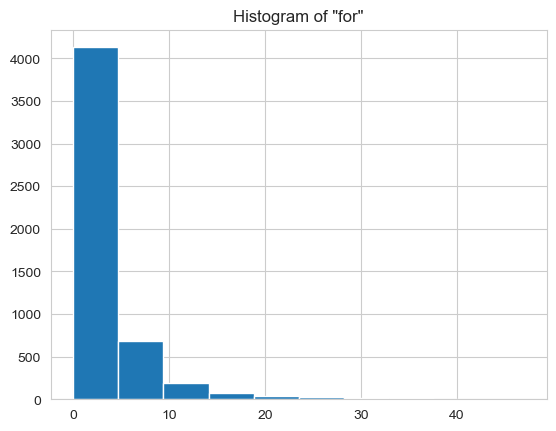

<Figure size 640x480 with 0 Axes>

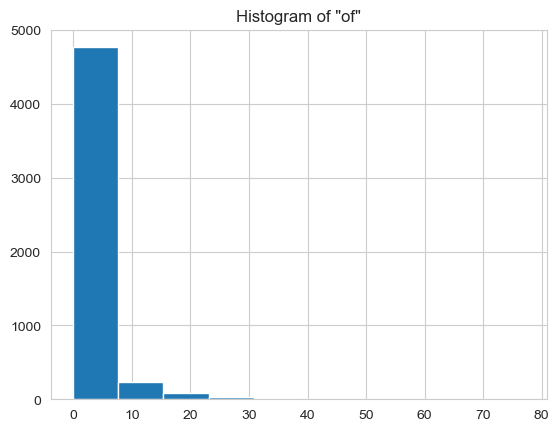

<Figure size 640x480 with 0 Axes>

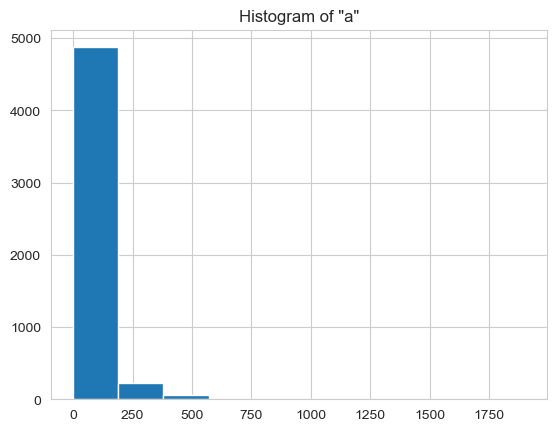

<Figure size 640x480 with 0 Axes>

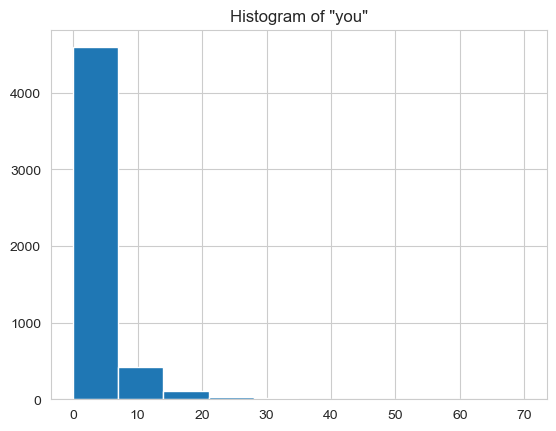

<Figure size 640x480 with 0 Axes>

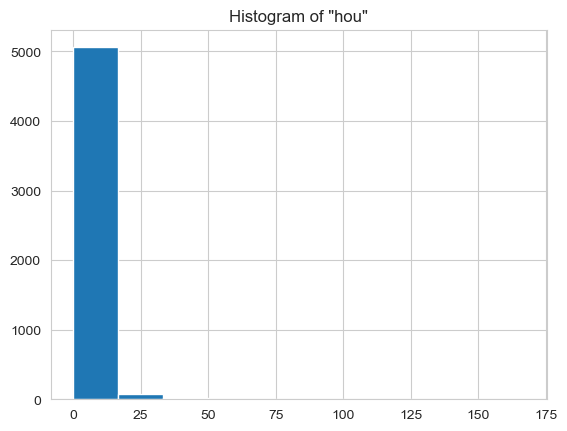

<Figure size 640x480 with 0 Axes>

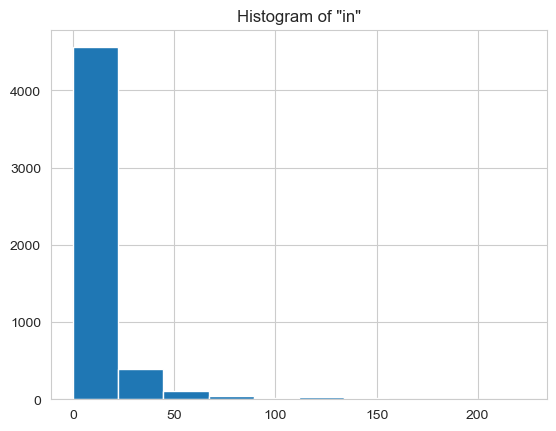

<Figure size 640x480 with 0 Axes>

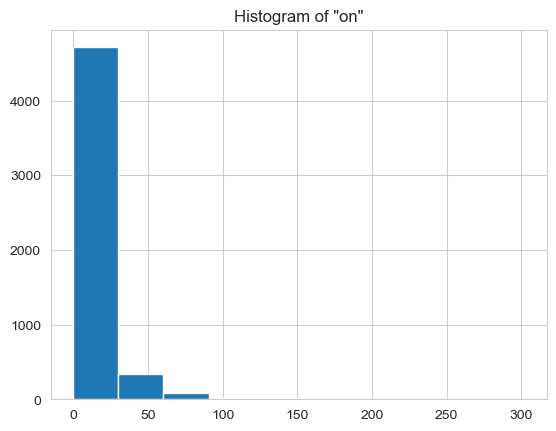

In [11]:
for column in df.columns[:11]:
        plt.figure()
        sns.set_style('whitegrid')
        df.hist(column=column)
        plt.title(f'Histogram of "{column}"')
        plt.show() # Plotting histogram (frequency in the email for each word) for first 11 columns to see the distribution of data

In [12]:
for column in df.columns:
    value_counts_series = df[column].value_counts() # display value counts for each column - for each column, this line calculates the frequency of each unique value using the value_counts() method. It returns a pandas Series where the index represents unique values, and the values represent their frequencies.
    print(f"Value counts for {column}:\n{value_counts_series}\n") # prints the column name and its corresponding value counts

Value counts for the:
0      1323
1       628
2       545
3       412
4       329
       ... 
54        1
99        1
124       1
64        1
82        1
Name: the, Length: 90, dtype: int64

Value counts for to:
0      1051
1       704
2       544
3       503
4       375
       ... 
111       1
63        1
65        1
85        1
88        1
Name: to, Length: 72, dtype: int64

Value counts for ect:
1      2587
2       875
3       351
4       229
5       161
       ... 
344       1
81        1
101       1
194       1
85        1
Name: ect, Length: 90, dtype: int64

Value counts for and:
0     2091
1      928
2      538
3      362
4      248
5      195
6      159
7       96
8       86
9       64
11      40
10      39
12      34
13      26
16      25
14      24
15      21
18      17
20      17
19      17
21      14
17      11
24      10
23      10
22       9
27       8
26       7
25       7
30       7
28       5
33       5
29       5
35       5
43       4
40       4
38       4
32       3


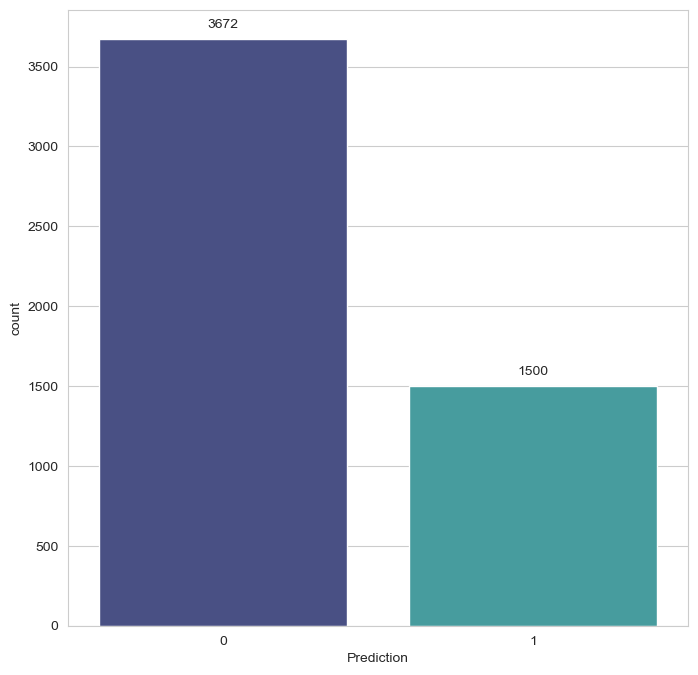

In [13]:
fig = plt.figure(figsize=(8,8)) # create a figure with a specified size

ax = sns.countplot(x="Prediction", data=df, palette='mako') # using countplot to visualize the predictions which are not spam (0) and spam (1)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points') # annotate each bar in the countplot with its height

plt.xlabel = "Prediction"
plt.title='Count of Predictions'
plt.show()

# 5.2. Correlation Analysis

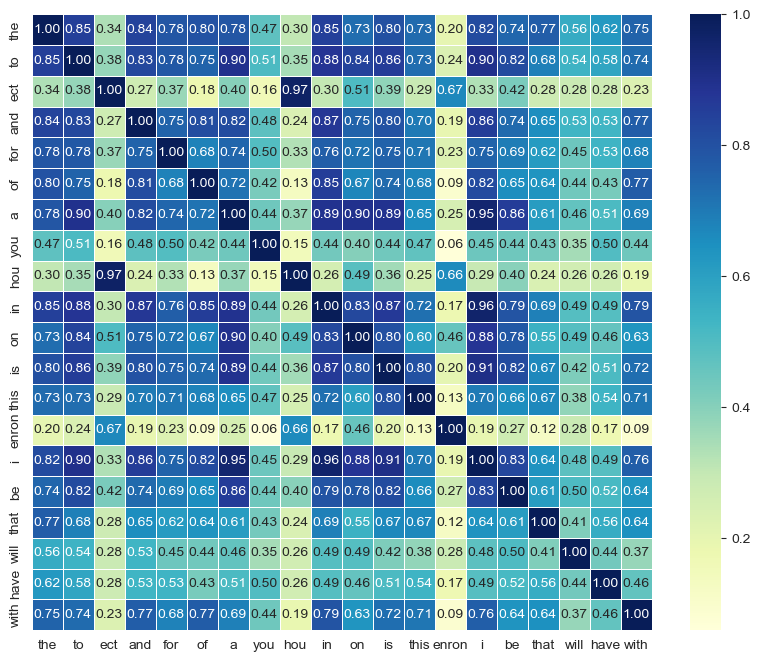

In [14]:
selected_columns = df.iloc[:, :20]

# Calculate the correlation matrix for the first 20 features
correlation_matrix = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title='Correlation Heatmap of the First 20 Columns'
plt.show()

A correlation matrix is a table that shows the correlation coefficients between many variables. Each cell in the table represents the correlation between two variables. The values range from -1 to 1:

- 1: Perfect positive correlation (as one variable increases, the other also increases).
- 0: No correlation.
- -1: Perfect negative correlation (as one variable increases, the other decreases).

Values close to 1 or -1 indicate a strong correlation and values close to 0 indicate a weak or no correlation.
Positive values indicate a positive correlation, and negative values indicate a negative correlation.

In this case, we have many coefficients that are above 0.50 and this means that some of the words have a moderate to strong positive correlation such as "the" and "i" or "the" and "that".

For example, if you have words like "the" and "i" with a correlation coefficient above 0.50, it indicates that the occurrences of these two words tend to increase or decrease together. Similarly, if "the" and "that" have a correlation coefficient above 0.50, it suggests a positive correlation, meaning that as the frequency of "the" increases, the frequency of "that" also tends to increase.

# 6. Feature Selection

Feature selection is a process in machine learning and statistics where choosing a subset of relevant features or variables from a larger set. For spam classification, feature selection is crucial to identify the most relevant and informative features that contribute to distinguishing between spam and non-spam emails.

In [15]:
X = df.drop(columns='Prediction',axis=1) # Explanatory variables
y = df['Prediction'] # target (dependent) variable

In [16]:
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

                  Score  P-values
Attribute                        
i          20933.845216       0.0
s           9905.907062       0.0
r           9581.168541       0.0
a           8297.355495       0.0
o           7767.524289       0.0
n           6818.365184       0.0
e           6309.085868       0.0
p           6102.448757       0.0
t           5700.608037       0.0
d           4752.245232       0.0
l           4625.130071       0.0
g           4456.134421       0.0
in          4304.410057       0.0
f           3982.632753       0.0
b           3676.791749       0.0
u           3616.623602       0.0
v           3225.945897       0.0
of          2971.842630       0.0
ect         2916.057301       0.0
enron       2821.078431       0.0


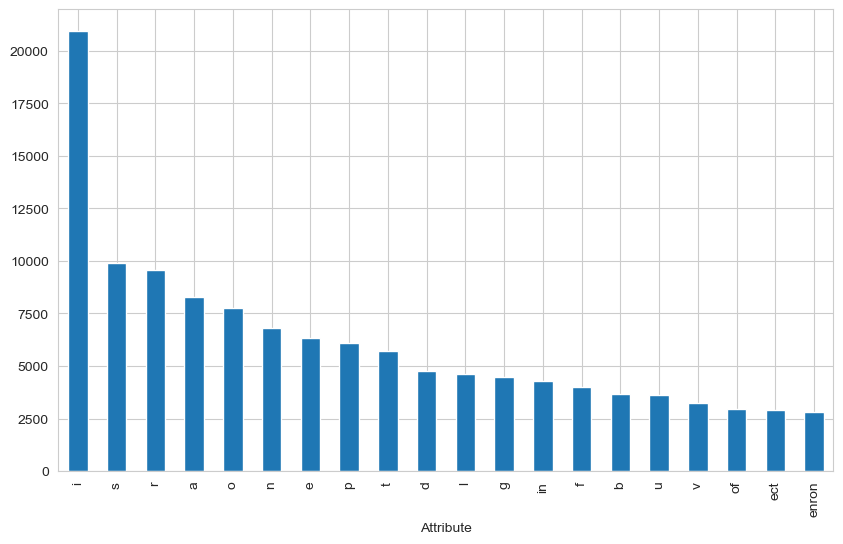

In [18]:
best_fe = SelectKBest(score_func=chi2, k=20)

fit_obj = best_fe.fit(X, y) # fit (invokes the chi2 function)

# The instance fit_obj has attributes scores_ and pvalues_
scores = pd.DataFrame(fit_obj.scores_) 
pvals = pd.DataFrame(fit_obj.pvalues_)

columns = pd.DataFrame(X.columns) # Get the column names

feature_scores = pd.concat([columns, scores, pvals], axis=1)  # concatenate and obtain a DataFrame
feature_scores.columns = ['Attribute', 'Score', 'P-values']   # set the DataFrame column names

# Select the n best (largest) scores
n_top_features = 20  # Adjust this value as needed
best_df_chi2 = feature_scores.nlargest(n_top_features, 'Score')
best_df_chi2.set_index('Attribute', inplace=True)

print(best_df_chi2) # prints the best 20 coefficients from the dataset

# Plot the bar chart
plt.figure(figsize=(10, 6)) # create a figure with a specified size
best_df_chi2['Score'].plot(kind='bar') 
plt.ylabel='Score'
plt.xlabel='Attribute'
plt.title=f'Top {n_top_features} features based on chi-squared test'
plt.show()

A p-value of 0 in the context of the chi-squared test indicates that the observed data is extremely unlikely under the assumption of the null hypothesis. In other words, it suggests a strong evidence against the null hypothesis.

In the chi-squared test for feature selection, the null hypothesis is often that there is no association between the feature and the target variable. A p-value of 0 suggests that the feature is highly associated with the target variable, and you may reject the null hypothesis.

As seen p-values of 0 mean that the chi-square test provides strong evidence that the characteristics are related to the target variable.

As can be seen from the graph, the feature with the highest coefficient is "i" is followed by "s" and "r". The feature "i" implies that an increase in the value of that feature has a stronger influence on the predicted outcome. Features with positive coefficients contribute positively to the predicted outcome, meaning that an increase in their values is associated with an increase in the likelihood of the positive class

Of course there are other methods for feature selection such as Lasso Regression but in this case can not applyng because the Lasso regression is commonly used for regression tasks where the goal is to predict a continuous outcome.

# 7. Dimensionality Reduction


Dimensionality reduction is a technique used in machine learning and data analysis to reduce the number of features or variables in a dataset while preserving its essential information. The primary goal is to simplify the dataset, making it more manageable and potentially improving the performance of machine learning models.

In [19]:
scaler = StandardScaler() # Initialize the StandardScaler which is used to standardize (normalize) the features in the feature X. Standardization ensures that each feature has a mean of 0 and a standard deviation of 1.

X = scaler.fit_transform(X) # # Standardize the feature X
n_pcs = 5
pca_obj = PCA(n_components=n_pcs) # # Set the desired number of principal components (PCs)
principal_components = pca_obj.fit_transform(X)  # compute PCs

princomps_df = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5']) #  store the principal components with column names

princomps_df.head(10)

,PC 1,PC 2,PC 3,PC 4,PC 5
0,-8.069820,-2.853988,0.793961,0.707968,0.622683
1,7.878270,4.976469,-5.980648,1.984768,-3.645968
2,-7.866094,-2.731060,0.416034,0.732060,0.573463
3,-1.798441,2.859689,-5.402446,0.587531,-0.931906
4,-2.058668,2.258399,-4.651434,0.655274,-0.466641
5,2.100273,-0.372316,2.880262,-0.163794,1.362698
6,-4.227434,-0.420360,-0.930021,0.329715,0.479314
7,-4.687679,-2.139043,2.412199,0.328396,1.324583
8,-5.444063,-0.701527,-0.126143,-0.214239,0.235388
9,-0.930155,2.763204,-3.145340,0.258003,0.959858


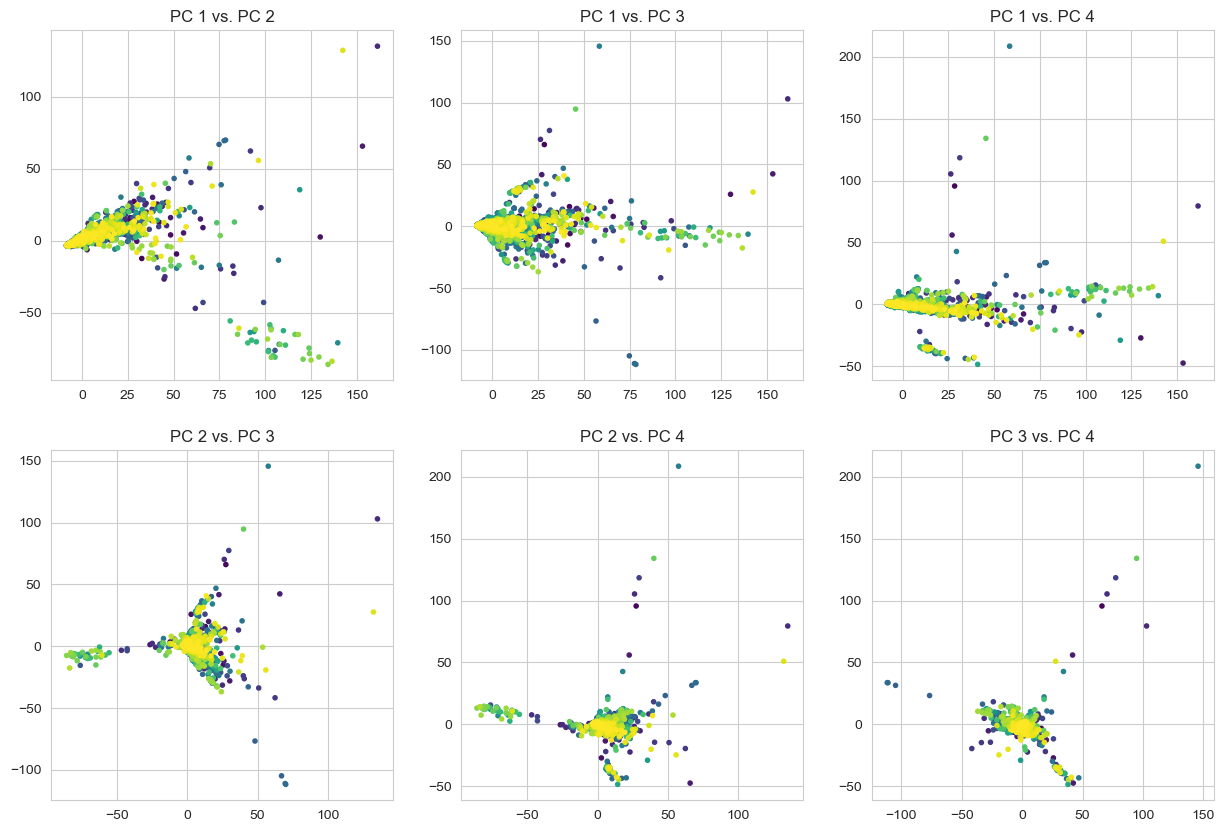

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Define the principal components to be plotted
pcs_to_plot = [('PC 1', 'PC 2'), ('PC 1', 'PC 3'), ('PC 1', 'PC 4'),
               ('PC 2', 'PC 3'), ('PC 2', 'PC 4'), ('PC 3', 'PC 4')]

for i, (pc_x, pc_y) in enumerate(pcs_to_plot): # for loop over each pair and create scatter plots
    row = i // 3 # calculate the row and column index for subplot
    col = i % 3

    ax[row, col].set_title(f'{pc_x} vs. {pc_y}')
    ax[row, col].scatter(princomps_df[pc_x], princomps_df[pc_y], c=princomps_df.index, cmap='viridis', marker=".")

plt.show()

# 8. Data Modeling

In [21]:
# Step 1: Initialize the StandardScaler which is used to standardize (normalize) the features of X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: PCA
n_components = 5  # Choose the number of principal components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled) # fitting the X_scaled

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=1111)

Use train_test_split to split the dataset into training and testing sets. The function takes the following parameters:

X_pca: reduced dimensions (principal components).
y: target variable (Prediction for spam or nost spam(1,0))
test_size: The proportion of the dataset to include in the test split (here, 20% for testing and the training set of features 80% of the data)

In [23]:
# Print the shape of the original X, X_train and X_test
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5172, 3000)
(4137, 5)
(1035, 5)


In [24]:
# Define the perform_metrics function that takes y_test (true labels) and y_pred (predicted labels) as input
def perform_metrics(y_test,y_pred):
    # Calculate various classification metrics through which we can evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Print and display metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(classification_report(y_test, y_pred))
    
    # Display the confusion matrix using seaborn heatmap
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="GnBu", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

    plt.title = 'Confusion Matrix'
    plt.xlabel = 'Predicted'
    plt.ylabel = 'Actual'
    plt.show()

# 8.1. Logistic Regression

Logistic regression is a supervised machine learning algorithm mainly used for binary classification where we use a logistic function, also known as a sigmoid function that takes input as independent variables and produces a probability value between 0 and 1. For example, we have two classes Class 0 and Class 1 if the value of the logistic function for an input is greater than 0.5 (threshold value) then it belongs to Class 1 it belongs to Class 0. It’s referred to as regression because it is the extension of linear regression but is mainly used for classification problems
.
Logistic Regression is commonly used for binary classification problems, and email spam classification is typically treated as a binary classification task where the goal is to predict whether an email is spam (positive class) or not spam (negative class).

The first algorithm which I used is Logistic Regression.

In [25]:
logr_model = LogisticRegression() # Create a Logistic Regression model

In [26]:
logr_model.fit(X_train,y_train) # fitted (trained) our Logistic Regression model (logr_model) on the training data (X_train and y_train).

LogisticRegression()

In [27]:
y_pred_logr = logr_model.predict(X_test) # The variable y_pred_logr stores the predicted labels for the test set. Each element of y_pred_logr corresponds to the predicted class (or label) for the corresponding data point in X_test

In [28]:
y_pred_logr

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

# 8.1.1. Evaluate model

Accuracy: 0.93
Precision: 0.90
Recall: 0.82
F1 Score: 0.86
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       753
           1       0.90      0.82      0.86       282

    accuracy                           0.93      1035
   macro avg       0.92      0.89      0.90      1035
weighted avg       0.92      0.93      0.92      1035

Confusion Matrix:
[[726  27]
 [ 50 232]]


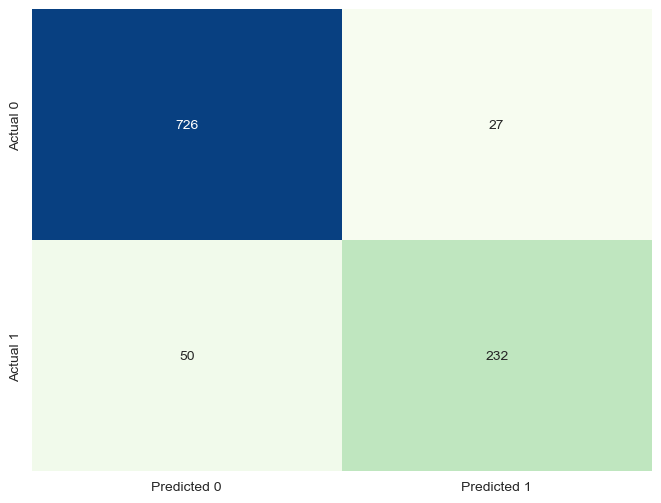

In [29]:
perform_metrics(y_test, y_pred_logr) 

- The accuracy is the ratio of correctly predicted instances to the total instances. In this case, it's 93%, indicating that the model correctly predicted the class for 93% of the test instances. The accuracy metric is one of important measure for evaluating performance of the model. 93% accuracy is shows us that the model performs well;

- 0.90 of precision it means that when the model predicts an email as spam, it is correct 90%. Precision is the ratio of correctly predicted positive observations to the total predicted positives;

- Recall is correctly predicted positive observations to the all observations in actual class and in this case it means that the model correctly identified 82% of the actual spam emails;

- A confusion matrix shows the number of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). 
     - Тrue Positives (TP): 726 -> 726 instances were correctly predicted as non - spam;
     - True Negatives (TN): 232 -> 232 instances were correctly predicted as spam
     - False Positives (FP): 27 -> The model incorrectly classified 27 instances as spam when they were actually non-spam.
     - False Negatives (FN): 50 -> The model incorrectly classified 50 instances as non-spam when they were actually spam.

The model performed well in correctly identifying both spam and non-spam emails (high TP and TN).

# 8.1.2. ROC Analysis and check for overfitting

(ROC) analysis is a tool used to evaluate the performance of a binary classification model at various threshold settings. It's particularly useful when I want to understand how well a model can distinguish between the positive and negative classes.

The ROC curve is a graphical representation of the trade-off between TPR and FPR at various thresholds. It plots TPR against FPR for different threshold values.

- Area Under the ROC Curve (AUC-ROC) -  higher AUC-ROC indicates better discrimination between the positive and negative classes.

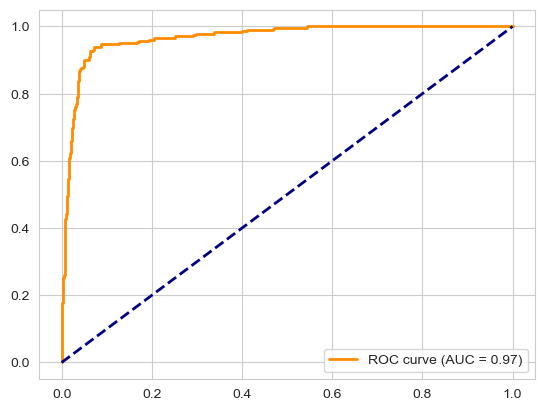

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, logr_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel = 'False Positive Rate'
plt.ylabel = 'True Positive Rate'
plt.title = 'Receiver Operating Characteristic Curve'
plt.legend(loc="lower right")
plt.show()

-  The AUC ranges from 0 to 1, with higher values indicating better performance. A value of 0.97 suggests that Logistic Regression model has an excellent ability to discriminate between spam and non-spam emails.

- The curve is closer to the upper-left corner, which is desirable. The closer the curve is to the upper-left corner, the better the trade-off between true positive rate (sensitivity) and false positive rate. 

However, a check should be made for the most common problem with the models, namely **overfitting.**

Some of popular flags for overfitting: 

- High Training Accuracy, Low Testing Accuracy;
- Large Differences in Training and Testing Performance
 

Therefore, we calculate all the metrics we need to evaluate the model and on the training dataset. If the accuracy of the training data set is greater than the accuracy of the test data set, it means that there is overfitting. 

In [31]:
y_train_pred_logr = logr_model.predict(X_train)

print("Training Set:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_logr):.2f}")
print("Classification Report:\n", classification_report(y_train, y_train_pred_logr))

Training Set:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      2919
           1       0.89      0.77      0.83      1218

    accuracy                           0.90      4137
   macro avg       0.90      0.87      0.88      4137
weighted avg       0.90      0.90      0.90      4137



In this case the accuracy of the train dataset is less than the accuracy of the tast dataset and it is means that there is not overfitting.

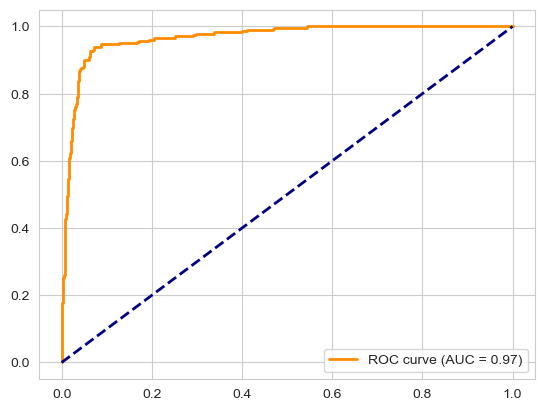

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, logr_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel = 'False Positive Rate'
plt.ylabel = 'True Positive Rate'
plt.title = 'Receiver Operating Characteristic Curve'
plt.legend(loc="lower right")
plt.show()

# 8.1.3. Cross - validation with k-Fold = 6

The cross_val_score function is used to perform k-fold cross-validation. In this case, cv=6 specifies 6-fold cross-validation. The function returns an array of accuracy scores for each fold. The cross-validation scores represent the accuracy achieved by the Logistic Regression model on different subsets of the training data. Each score corresponds to a different fold.

In [33]:
cross_val_scores = cross_val_score(logr_model, X_train, y_train, cv=6, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.89275362 0.88985507 0.90144928 0.92307692 0.91436865 0.89114659]
Mean Accuracy: 0.9021083555948199


The mean accuracy is a summary statistic that provides an average performance measure across all folds. In this case, the mean accuracy is around 90.2%. The results suggest that, on average, the Logistic Regression model achieves around 90.2% accuracy on the training data.

# 8.2. Random Forest Classifier

The Random Forest Classifier is an ensemble learning method that builds a multitude of decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees

Accuracy: 0.94
Precision: 0.87
Recall: 0.91
F1 Score: 0.89
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       753
           1       0.87      0.91      0.89       282

    accuracy                           0.94      1035
   macro avg       0.92      0.93      0.92      1035
weighted avg       0.94      0.94      0.94      1035

Confusion Matrix:
[[713  40]
 [ 24 258]]


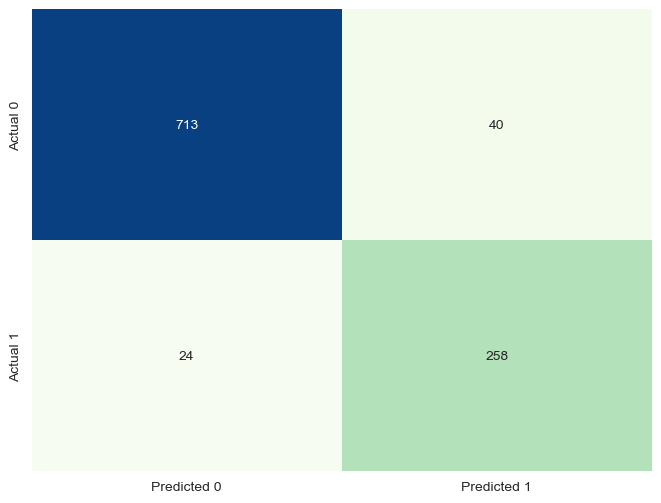

In [34]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Create a Random Forest Classifier

# Train the model
rf_classifier.fit(X_train, y_train) # Train the model

# Predictions on the test set
y_pred_rf = rf_classifier.predict(X_test) # Make predictions on the test set

perform_metrics(y_test, y_pred_rf)



The n_estimators parameter in a Random Forest Classifier specifies the number of trees in the forest. In your case, n_estimators=100 means that your Random Forest consists of 100 decision trees. This parameter controls the number of trees to be used in the Random Forest. A higher number of trees can lead to a more robust and stable model, but it may also increase the computational cost.

- 94% of the predictions were correct;
- A precision of 87% means that, among the instances predicted as positive, 87% were correctly classified;
- A recall of 91% indicates that the model identified 91% of the actual positive instances;
- The F1 score of 89% suggests a good balance between precision and recall;
- The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions:
  - True Positive (TP): 713 ->  correctly identified 713 non-spam emails;
  - False Positive (FP): 40 -> incorrectly classified 40 non-spam emails as spam;
  - False Negative (FN): 24 -> incorrectly classified 24 spam emails as non-spam;
  - True Negative (TN): 258 -> correctly identified 258 spam emails





The model performs well in correctly identifying non-spam emails (class 0) with high precision (97%) and recall (95%). This suggests that the model is effective at distinguishing non-spam emails. The model also performs well in identifying spam emails (class 1) with high precision (87%) and recall (91%). The overall accuracy of 94% indicates good overall model performance on the test set.


# 8.2.1. Cross - Validation with K-Fold = 6

In [35]:
cross_val_scores = cross_val_score(rf_classifier, X_train, y_train, cv=6, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.94927536 0.95072464 0.93768116 0.94339623 0.95065312 0.92017417]
Mean Accuracy: 0.9419841119595015


The mean accuracy is approximately 94.22%, indicating that, on average, the Random Forest Classifier performs well across different folds of the training data. This suggests that the model generalizes effectively to new data, and the performance is consistent.

# 8.3. Support Vector Machine

Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression tasks. SVM aims to find a hyperplane in an N-dimensional space (where N is the number of features) that distinctly classifies the data points into different classes.

Accuracy: 0.92
Precision: 0.89
Recall: 0.79
F1 Score: 0.84
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       753
           1       0.89      0.79      0.84       282

    accuracy                           0.92      1035
   macro avg       0.91      0.88      0.89      1035
weighted avg       0.91      0.92      0.91      1035

Confusion Matrix:
[[724  29]
 [ 58 224]]


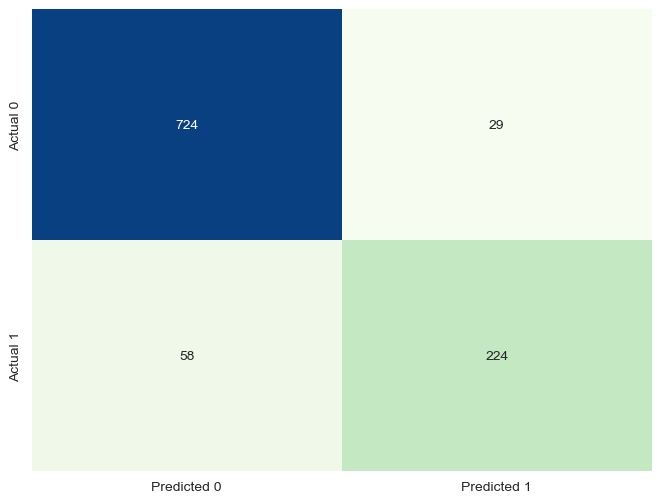

In [36]:
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42) # Create an SVM model

# Train the model
svm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_svc = svm_classifier.predict(X_test)

perform_metrics(y_test, y_pred_svc)


-  92% of accuracy, which means the model is accurate in predicting the class labels;
-  Precision of 89% indicates that when the model predicts a positive class, it is correct 89% of the time;
-  A recall of 79% means that the model is able to capture 79% of the actual positive instances;
-  F1 score of 84% is a good overall measure of the model's performance.
- Confusion matrix:
  - True Positive (TP): 724 -> are the emails correctly predicted as non - spam
  - False Positive (FP): 29 -> are non-spam emails that were incorrectly predicted as spam. 
  - True Negative (TN): 224 -> are the emails correvtly predicted as spam
  - False Negative (FN): 58 -> are spam emails that were incorrectly predicted as non-spam

# 8.3.1. Cross - Validation with K-Fold = 6¶

In [37]:
cross_val_scores = cross_val_score(svm_classifier, X_train, y_train, cv=6, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.88405797 0.90434783 0.8942029  0.89259797 0.91001451 0.87373004]
Mean Accuracy: 0.893158536841884


# 9. **Models Comparision**

In [38]:
print("Algorithms analised: ")
logr_accuracy = accuracy_score(y_test, y_pred_logr)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
svm_accuracy = accuracy_score(y_test, y_pred_svc)

# Print the results
print(f"Logistic Regression: "+str(round(logr_accuracy*100,2))+" % of accuracy")
print("Random Forest: "+str(round(rf_accuracy*100,2))+" % of accuracy")
print(f"SVM: "+str(round(svm_accuracy*100,2))+" % of accuracy")

Algorithms analised: 
Logistic Regression: 92.56 % of accuracy
Random Forest: 93.82 % of accuracy
SVM: 91.59 % of accuracy


Random Forest has the highest accuracy among the three models.
Logistic Regression follows closely with a slightly lower accuracy.
Support Vector Machine (SVM) has the lowest accuracy among the three. 

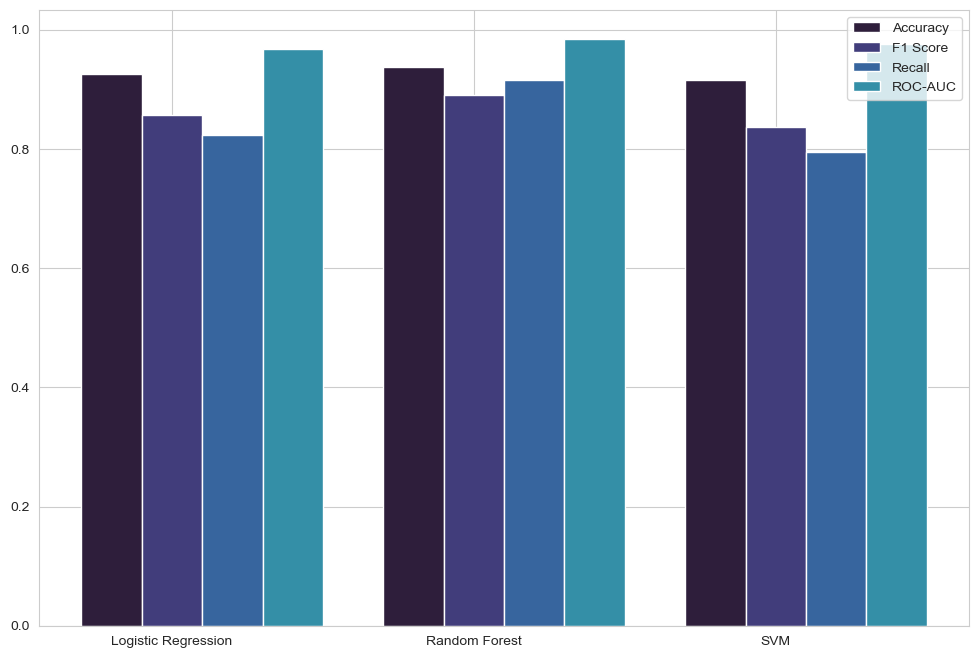

In [39]:
sns.set_palette('mako')
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
}

# Lists to store metrics for each model
accuracy_list = []
f1_list = []
recall_list = []
roc_auc_list = []
model_names = []

# Train models and calculate metrics
for model_name, model in models.items():
    model_names.append(model_name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Check if the model supports probability estimates
    if hasattr(model, 'predict_proba'):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc_list.append(roc_auc)
    else:
        roc_auc = None
        roc_auc_list.append(None)
    
    accuracy_list.append(accuracy)
    f1_list.append(f1)
    recall_list.append(recall)

# Create grouped bar plot
bar_width = 0.2
index = np.arange(len(model_names))

plt.figure(figsize=(12, 8))

plt.bar(index - bar_width, accuracy_list, width=bar_width, label='Accuracy', align='center')
plt.bar(index, f1_list, width=bar_width, label='F1 Score', align='center')
plt.bar(index + bar_width, recall_list, width=bar_width, label='Recall', align='center')
plt.bar(index + 2 * bar_width, roc_auc_list, width=bar_width, label='ROC-AUC', align='center')

plt.xlabel='Model'
plt.ylabel='Metrics'
plt.title='Comparison of Metrics for Different Models'
plt.xticks(index, model_names)  # Set x-axis ticks and labels
plt.legend()

plt.show()

The Random Forest Algorithm demonstrates superior predictive performance in terms of true positive and true negative cases (spam and non-spam emails) based on the confusion matrix and classification results.
Performs well with an accuracy of 93.82%, but may have limitations in capturing complex relationships compared to Random Forest.
Support Vector Machine exhibits lower accuracy and lower values for precision, recall, and f1-score, especially for the spam class.

Random Forest shows better-balanced precision and recall metrics, resulting in a higher F1-score for the spam class.
Logistic Regression achieves good precision and recall, but with a slightly lower F1-score compared to Random Forest.
Support Vector Machine reports lower values for precision, recall, and f1-score for the spam class.

Cross-Validation:

Random Forest: Cross-validation results confirm the robustness and reliability of the Random Forest model, with consistently high accuracy.
Logistic Regression: Demonstrates a good balance between accuracy and generalization.
Support Vector Machine: The lower accuracy in cross-validation suggests potential challenges in SVM's ability to generalize well.

Conclusion

Random Forest emerges as the top-performing model, achieving the highest accuracy and demonstrating a strong ability to generalize, logistic regression performs well, providing a balance between simplicity and accuracy and Support Vector Machine shows lower accuracy and less balanced precision-recall metrics, indicating challenges in distinguishing spam emails effectively.

# **The best algorithm for this dataset is Random Forest**

# 10. Neural Networks

In [40]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')


Epoch 1/10


117/117 [==============================] - 3s 9ms/step - loss: 0.3880 - accuracy: 0.8391 - val_loss: 0.2587 - val_accuracy: 0.8889
Epoch 2/10
117/117 [==============================] - 1s 6ms/step - loss: 0.2293 - accuracy: 0.9022 - val_loss: 0.2183 - val_accuracy: 0.8961
Epoch 3/10
117/117 [==============================] - 0s 4ms/step - loss: 0.1988 - accuracy: 0.9140 - val_loss: 0.2005 - val_accuracy: 0.9010
Epoch 4/10
117/117 [==============================] - 0s 3ms/step - loss: 0.1833 - accuracy: 0.9194 - val_loss: 0.2072 - val_accuracy: 0.9155
Epoch 5/10
117/117 [==============================] - 0s 4ms/step - loss: 0.1805 - accuracy: 0.9218 - val_loss: 0.1810 - val_accuracy: 0.9106
Epoch 6/10
117/117 [==============================] - 0s 4ms/step - loss: 0.1758 - accuracy: 0.9216 - val_loss: 0.1805 - val_accuracy: 0.9058
Epoch 7/10
117/117 [==============================] - 0s 4ms/step - loss: 0.1687 - accuracy: 0.9259 - val_loss: 0.1768 - val_accuracy: 0.9203
Epo

The neural network demonstrates outstanding performance with an accuracy of 94 %. Shows high accuracy and full for classes 0 and 1, reflecting excellent ability to correctly predict true positive and negative cases.

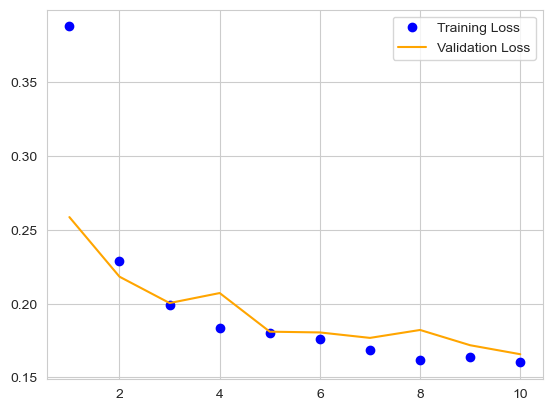

In [41]:
# Retrieve the loss in function of the epoch for the training set
loss_hist = history.history['loss']

# Retrieve the loss in function of the epoch for the validation set
loss_hist_validation = history.history['val_loss']

# Plotting the training and validation loss using Matplotlib
plt.plot(range(1, len(loss_hist) + 1), loss_hist, 'bo', label='Training Loss')
plt.plot(range(1, len(loss_hist_validation) + 1), loss_hist_validation, 'orange', label='Validation Loss')

plt.title='Model Loss Over Epochs'
plt.xlabel='Epoch'
plt.ylabel='Loss'
plt.legend()

plt.show()

Тhe training and validation loss curves run in parallel almost, it indicates that the model is not overfitting or underfitting significantly during training. Both losses decrease or increase at a similar rate, suggesting that the model is generalizing well to both the training and validation datasets.

This is a positive sign, as it indicates that the model is learning from the training data without overemphasizing it to the point of poor generalization on unseen data. A small gap or even overlapping between training and validation loss curves is generally a good indication of a well-behaved model.

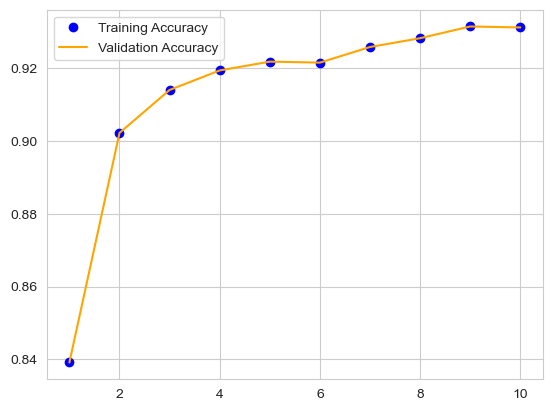

In [42]:
# Retrieve the loss in function of the epoch for the training set
loss_hist = history.history['accuracy']

# Retrieve the loss in function of the epoch for the validation set
loss_hist_validation = history.history['accuracy']

# Plotting the training and validation loss using Matplotlib
plt.plot(range(1, len(loss_hist) + 1), loss_hist, 'bo', label='Training Accuracy')
plt.plot(range(1, len(loss_hist_validation) + 1), loss_hist_validation, 'orange', label='Validation Accuracy')

plt.title='Model Loss Over Epochs'
plt.xlabel='Epoch'
plt.ylabel='Accuracy'
plt.legend()

plt.show()


The training accuracy and validation accuracy are close or lying on top of each other, it suggests that the model is not overfitting and is able to generalize well to new, unseen data. This is a positive outcome, indicating that the model is learning from the training data without compromising its ability to perform on new data.